In [1]:
# based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

# prepared dataset
from sklearn import datasets
# wy split with hands?
from sklearn.model_selection import train_test_split
# to search for hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt

Dataset type: <class 'sklearn.utils.Bunch'>
Items type: <class 'numpy.ndarray'> (1797, 8, 8)


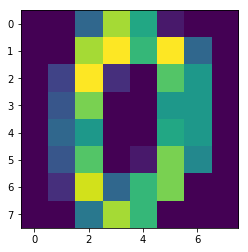

Now we have 1797 images flattened to 64-values vectors


In [2]:
# Loading Digits dataset
digits = datasets.load_digits()

print("Dataset type:", type(digits))
print("Items type:", type(digits.images), digits.images.shape)

# show first image
plt.imshow(digits.images[0])
plt.show()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
print("Now we have {} images flattened to {}-values vectors".format(*X.shape))
y = digits.target

In [3]:
# Split the dataset in two equal parts
# train for adjusting formula, test - for assessing result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# hyper parameters
tuned_parameters = [
    {
        'kernel': ['rbf'],        # radial basis function (~Gaussian)
        'gamma': [1e-3, 1e-4],    # kernel parameter (~variance in Gaussian)
        'C': [1, 10, 100, 1000]   # regularization parameter
    },
    {
        'kernel': ['linear'],     # linear kernel
        'C': [1, 10, 100, 1000]   # regularization parameter
    }
]

In [4]:
scores = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']  # _macro means macro averaged

for score in scores:
    print("# Tuning hyper-parameters for", score)
    print()
    
    # see other hyperparameters opimizers
    # http://scikit-learn.org/stable/modules/classes.html#hyper-parameter-optimizers
    
    clf = GridSearchCV(
            SVC(),             # "dummy" SVM classifier model
            tuned_parameters,  # grid
            cv=5,              # cross-validation parameters
            scoring=score      # estimation of what
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("{:.03f} (+/-{:.03f}) for {}".format(mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print("=====================================================")


# Tuning hyper-parameters for precision_macro

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are comp

In [5]:
# this is the best estimator
print(clf.best_estimator_)

# save it!
import pickle

with open('data.pickle', 'wb') as f:
    pickle.dump(clf.best_estimator_, f)
with open('data.pickle', 'rb') as f:
    my_estimator = pickle.load(f)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Predicted [1 2 9 3 8]
Target    [1 2 9 3 8]


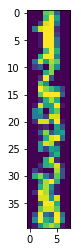

In [6]:
samples = [1, 340, 555, 999, 1796]
# apply predict() method to array of samples
predictions = my_estimator.predict([X[sample,:] for sample in samples])
print("Predicted", predictions)
print("Target   ", y[samples])

plt.imshow(digits.images[samples].reshape((len(samples) * 8, 8)))
plt.show()